# Retornos de ações

**Bibliotecas necessárias**

In [71]:
import datetime as dt
import pandas as pd
import numpy as np 
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from pandas_datareader import data as pdr


In [116]:
plt.style.use('seaborn-whitegrid')

**Obtenção dos dados**

In [192]:
end = dt.datetime(2022,12,31)
start = dt.datetime(2018, 1, 1)
ticker = 'CBA.AX'
df = pdr.get_data_yahoo(ticker, start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,80.330002,79.779999,80.300003,80.220001,1284609.0,65.283989
2018-01-02,80.644997,80.059998,80.470001,80.139999,1349269.0,65.218872
2018-01-03,80.480003,79.809998,80.480003,79.970001,1596303.0,65.080528
2018-01-04,81.250000,80.370003,80.540001,81.160004,2208531.0,66.048965
2018-01-07,81.750000,81.300003,81.400002,81.620003,1293549.0,66.423317


## Retornos Simples vs. Retornos Logarítmicos

### Retornos simples

Para um único período, o retornos simples é dado por:

\begin{align*}
    R_t &= \dfrac{P_t - P_{t-1}}{P_{t-1}} = \dfrac{P_t}{P_{t-1}} - 1 \Rightarrow\\
    1 + R_t &= \dfrac{P_t}{P_{t-1}}
\end{align*}

Para um multi-período $k$:

\begin{align*}
    1 + R_t(k) &= \dfrac{P_t}{P_{t-1}} \cdot \dfrac{P_{t-1}}{P_{t-2}} \cdot \cdots \cdot \dfrac{P_{t - k + 1}}{P{t - k}} = \dfrac{P_{t}}{P_{t - k}}\\
    1 + R_t(k) &= (1 + R_t) \cdot (1 + R_{t-1}) \cdot \cdots \cdots (1 + R_{t - k + 1})\\
    1 + R_t(k) &= \prod_{i = 0}^{k-1} (1 + R_{t - i})
\end{align*}

In [193]:
simple_returns = df.Close.pct_change()

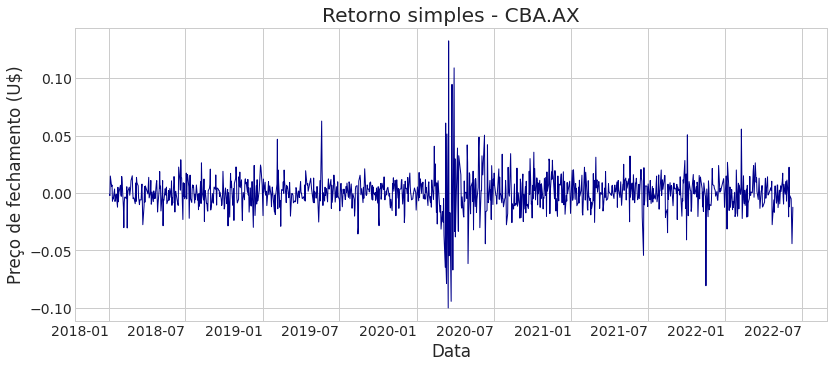

In [194]:
ax = simple_returns.plot(figsize=(12,6), lw=1, c='darkblue')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento (U$)')
ax.set_title(f'Retorno simples - {ticker}')
plt.xticks(rotation = 0)
plt.show()

### Retornos logarítmicos

Para um único período:

\begin{align*}
    r_t &= \ln (1 + R_t)
\end{align*}

Para um multi-epriodo $k$:

\begin{align*}
    r_t(k) &= \ln (1 + R_t(k)) = \ln [(1 + R_t) (1 + R_{t-1}) \cdot \cdots \cdot (1 + R_{t - k + 1})]\\
    r_t(k) &= \ln (1 + R_t(k)) = \ln(1 + R_t) + \ln (1 + R_{t-1}) + \cdots + \ln (1 + R_{t - k + 1})\\
    r_t(k) &= \ln (1 + R_t(k)) = r_t + r_{t-1} + \cdots + r_{t - k + 1}\\
    r_t(k) &= \ln (1 + R_t(k)) = \ln(P_t) - \ln(P_{t - k})
\end{align*}

In [195]:
log_returns = np.log(df.Close / df.Close.shift(1))

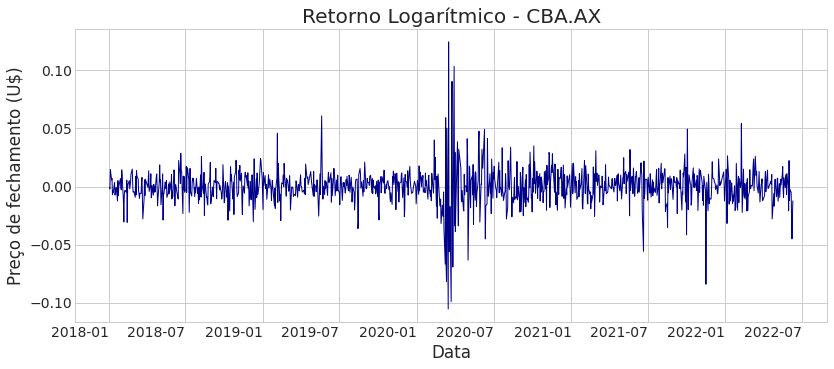

In [196]:
ax = log_returns.plot(figsize=(12,6), lw=1, c='darkblue')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento (U$)')
ax.set_title(f'Retorno Logarítmico - {ticker}')
plt.xticks(rotation = 0)
plt.show()

Se desejamos modelar retornos usando a distribuição normal:

* **Retornos simples:** O produto das variáveis de uma distribuição normal **NÃO** é normalmente distribuído

* **Retornos Logarítmicos** A soma de variáveis normalmente distribuídas segue uma distribuição normal.

### Histogramas

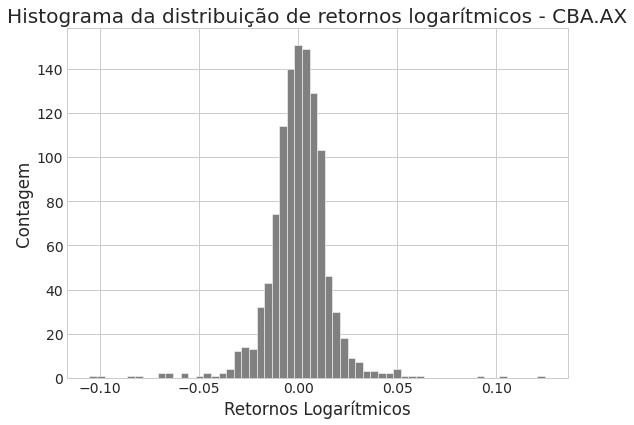

In [197]:
plt.subplots(figsize=(8,6))
plt.hist(log_returns, edgecolor='white', bins=60, color='gray')
plt.xlabel('Retornos Logarítmicos')
plt.ylabel('Contagem')
plt.title(f'Histograma da distribuição de retornos logarítmicos - {ticker}')
plt.show()

## Testando normalidade

### Gráfico Q-Q ou Quantile-Quantile

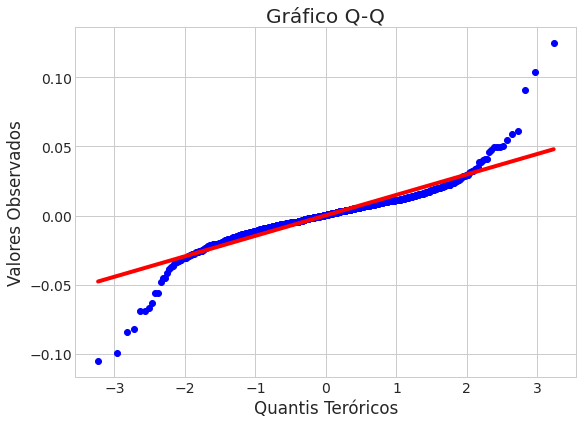

In [198]:
fig, ax = plt.subplots(figsize=(8,6))
stats.probplot(log_returns.dropna(), dist='norm', plot=pylab)
plt.title('Gráfico Q-Q')
plt.xlabel('Quantis Teróricos')
plt.ylabel('Valores Observados')
plt.show()

### Boxplots

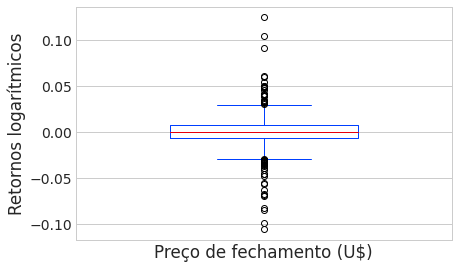

In [199]:
fig, ax = plt.subplots(figsize=(6,4))
log_returns.plot(kind='box', xticks=[])
plt.xlabel('Preço de fechamento (U$)')
plt.ylabel('Retornos logarítmicos')
plt.xlim(.85, 1.15)
plt.show()

### Testes de Hipóteses

#### Teste de Komolgorov-Smirnov

In [200]:
ks_stat, p_value = stats.kstest(log_returns.dropna(), 'norm')
alpha = 0.05


print(f"KS Statistics: {ks_stat:.2f}, p-value: {p_value:.6f}")
if p_value > alpha:
    print(f'Provavelmente Gaussiana ao nível de significância de {100*alpha:.1f}%')
else:
    print(f'Provavelmente não Gaussiana')


KS Statistics: 0.47, p-value: 0.000000
Provavelmente não Gaussiana


### Teste Shapiro Wilk

In [201]:
sw_stat, p_value = stats.shapiro(log_returns.dropna())
alpha = 0.05


print(f"SW Statistics: {sw_stat:.2f}, p-value: {p_value:.6f}")
if p_value > alpha:
    print(f'Provavelmente Gaussiana ao nível de significância de {100*alpha:.1f}%')
else:
    print(f'Provavelmente não Gaussiana')

SW Statistics: 0.88, p-value: 0.000000
Provavelmente não Gaussiana
